# The sledgehammer approach to the latitude EBM

The goal of this script is to compute steady-state solutions for the latitude EBM introduced in lectures using the 'sledgehammer' approach of Newton's method. We will find that, although this works, it is highly dependent on starting with the correct initial guess. 

We seek the steady-state solutions via 
$$
T* = \Phi(T*) = \frac{Q s(y)[1 - a(T*)] - A + k\bar{T^*}}{B + k}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.interpolate import interp1d

In [2]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q = 342.0 # solar constant (1380 W/m^2 divided by 4)

def Tbar(y, T):
    # Riemann sum approximation of the integral T(y) over y    
    I = 0
    for i in range(0, np.size(y)-1):
        dy = y[i+1] - y[i]
        I = I + T[i]*dy
        # print(i, yi, T[i])
        # I = I + 0.5*(T[i] + T[i+1])*dy
    return I

def afunc(T): 
    # albedo function; if T > Tc, set a = aw, elseif T < Tc, a = ai
    a = 0*T
    for i, TT in enumerate(T):
        if TT < Tc:
            aa = ai
        elif TT > Tc:
            aa = aw
        else:
            aa = (ai+aw)/2
        a[i] = aa
    return a

def myF(T, y):
    Tb = Tbar(y, T)
    Phi = (k*Tb + Q*s(y)*(1 - afunc(T)) - A)/(B+k)
    F = T - Phi
    return F

def myPhi(T, y):
    Tb = Tbar(y, T)
    Phi = (k*Tb + Q*s(y)*(1 - afunc(T)) - A)/(B+k)
    return Phi

In [3]:
Qmin = (Tc + A/B)*(B+k)/((1 - aw)*(s(1) + k/B))
Qmax = (Tc + A/B)*(B+k)/((1 - ai)*(s(0) + k/B))
print("Min Q value for ice free", Qmin)
print("Max Q value for complete ice Earth", Qmax)

Min Q value for ice free 330.3616063989335
Max Q value for complete ice Earth 440.72694936919913


[ 20.19023482  20.17662017  20.13577623  20.067703    19.97240048
  19.84986866  19.70010756  19.52311716  19.31889746  19.08744848
  18.8287702   18.54286263  18.22972577  17.88935962  17.52176417
  17.12693943  16.7048854   16.25560208  15.77908946  15.27534756
  14.74437636  14.18617586  13.60074608  12.988087    12.34819863
  11.68108097  10.98673402  10.26515777   9.51635223   8.7403174
   7.93705328   7.10655986   6.24883716   5.36388516   4.45170386
   3.51229328   2.5456534    1.55178423   0.53068577  -0.51764198
  -1.59319903  -2.69598537  -3.826001    -4.98324592  -6.16772014
  -7.37942364  -8.61835644 -22.39086038 -23.11363792 -23.85163183
 -24.60484211]
The solution converged.


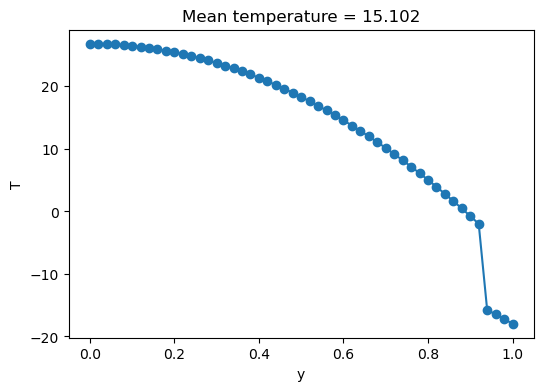

In [4]:
# Initialise the mesh with N points
N = 51
y = np.linspace(0, 1, N)

# Iterative scheme
# Form an initial guess 
# Try this one for the fake solution
Tequator = 20; Tpole = -12;
# Try this one for the true solution
# Tequator = 20
# Tpole = -12
T = Tequator + (Tpole - Tequator)*y
# T = 0*y - 9.5
# T = 0*y - 30
# T = 0*y + 30

# Run the solver
fwd = lambda T: T - myPhi(T, y)
print(myPhi(T,y))
sol = root(fwd, T)
print(sol.message)

# Plot the output
solT = sol.x;
fig = plt.figure(figsize=(6,4))
plt.plot(y, solT, '-o')
plt.xlabel('y'); plt.ylabel('T')
plt.title("Mean temperature = %1.3f" % Tbar(y, solT));

In [5]:
# 2022-23 delivery: ignore the below
# # Iterative scheme
# # Form an initial guess 
# # Try this one for the fake solution
# # Tequator = 20; Tpole = -20;
# # Try this one for the true solution
# Tequator = 20; Tpole = -12;
# T = Tequator + (Tpole - Tequator)*y
# # T = 0*y - 9.5
# # T = 0*y - 30
# # T = 0*y + 30
# plt.figure()
# for i in range(0,50):
#     T = myPhi(T,y)
#     Tb = Tbar(y,T)
#     plt.plot(i, Tb, 'o')